### Let's see if we can find the solar-like oscillations for KIC 9246715 with lightkurve

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [4]:
from lightkurve import KeplerLightCurveFile
KIC = 9246715
lc = KeplerLightCurveFile.from_archive(KIC, quarter=0).SAP_FLUX.normalize()
for q in range(1,17):
    lc = lc.append(KeplerLightCurveFile.from_archive(KIC, quarter=q).SAP_FLUX.normalize())

In [5]:
lc

KeplerLightCurve(KIC: 9246715)

<IPython.core.display.Javascript object>


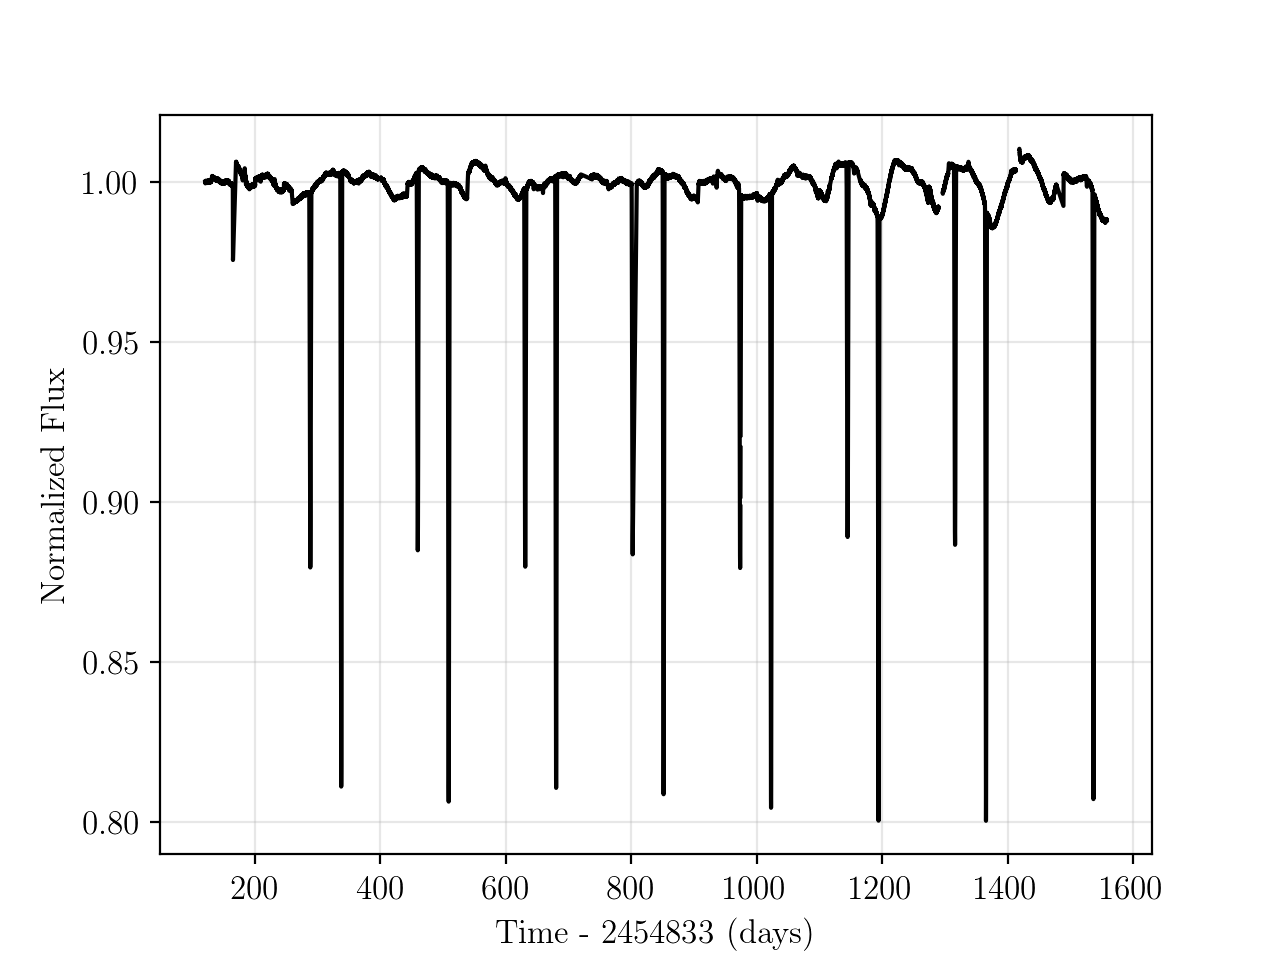

In [6]:
lc.plot()

<IPython.core.display.Javascript object>


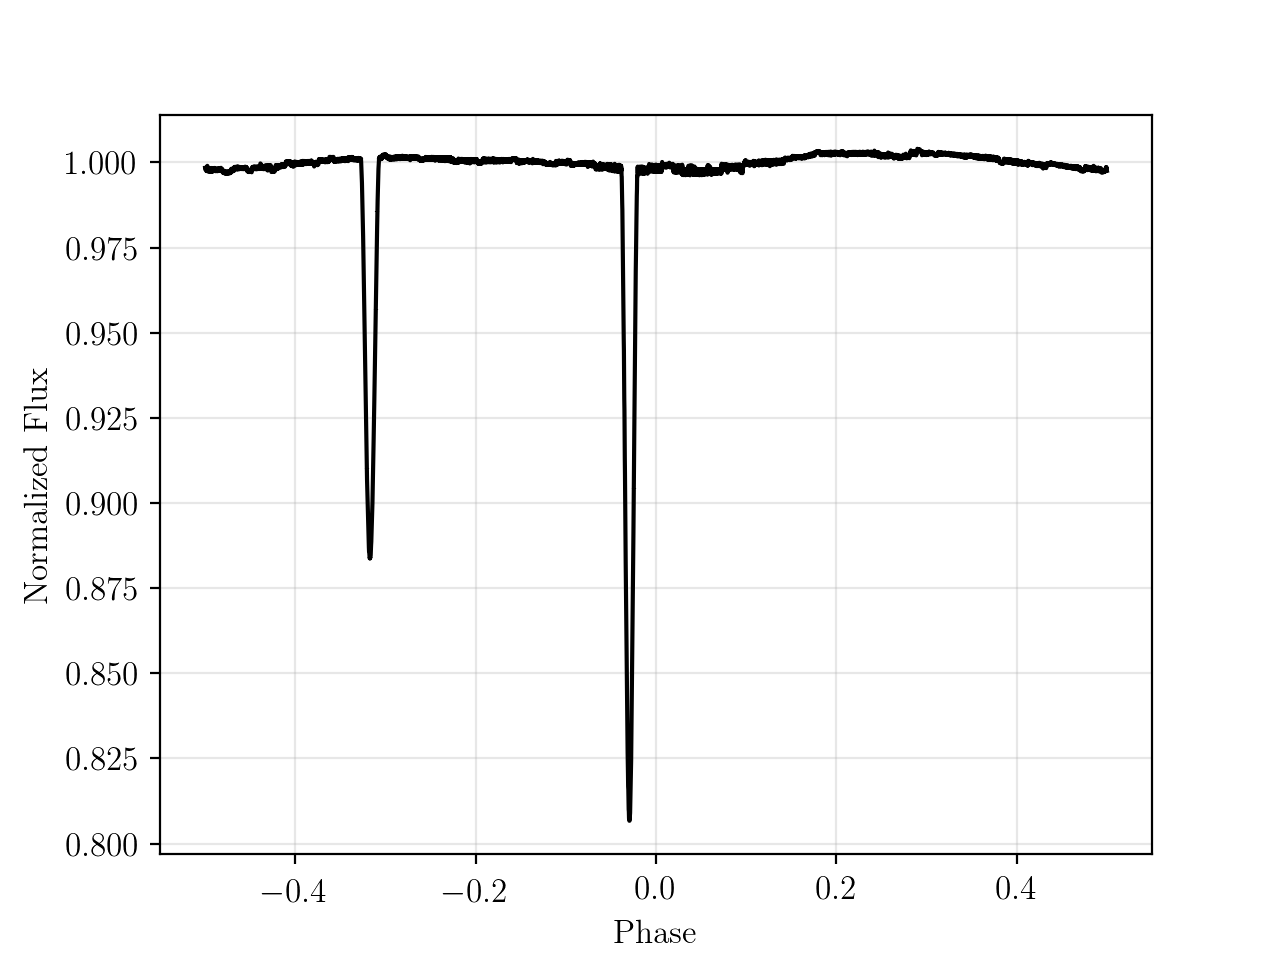

In [7]:
lc.fold(171.2776968).bin().plot()

### That was remarkably easy! However, to do gap filling and periodogram stuff, we need a KeplerLightCurve, not a KeplerLightCurveFile.

<IPython.core.display.Javascript object>


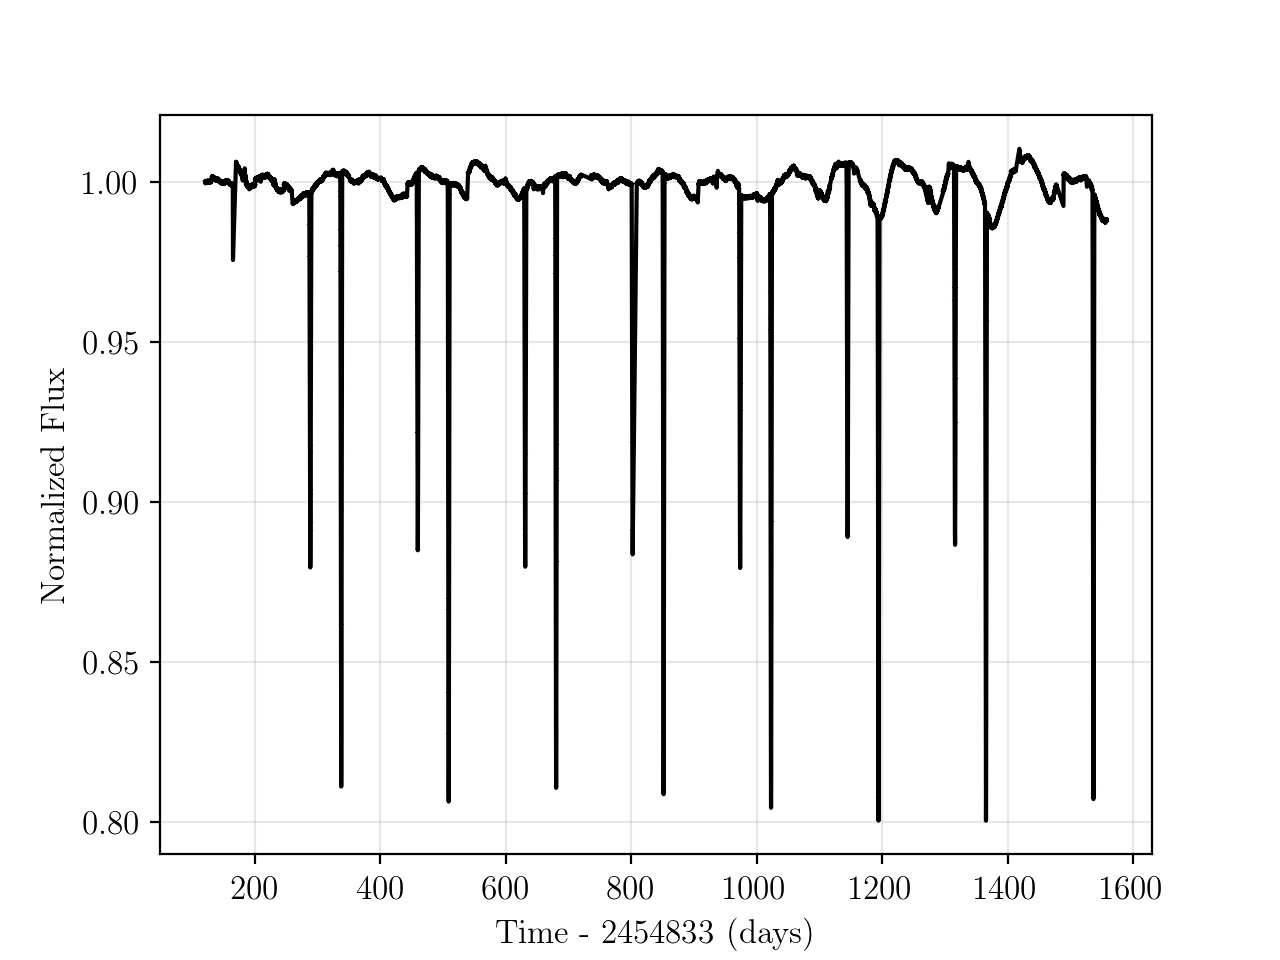

In [8]:
lc = lc.remove_nans()
lc.plot()

<IPython.core.display.Javascript object>


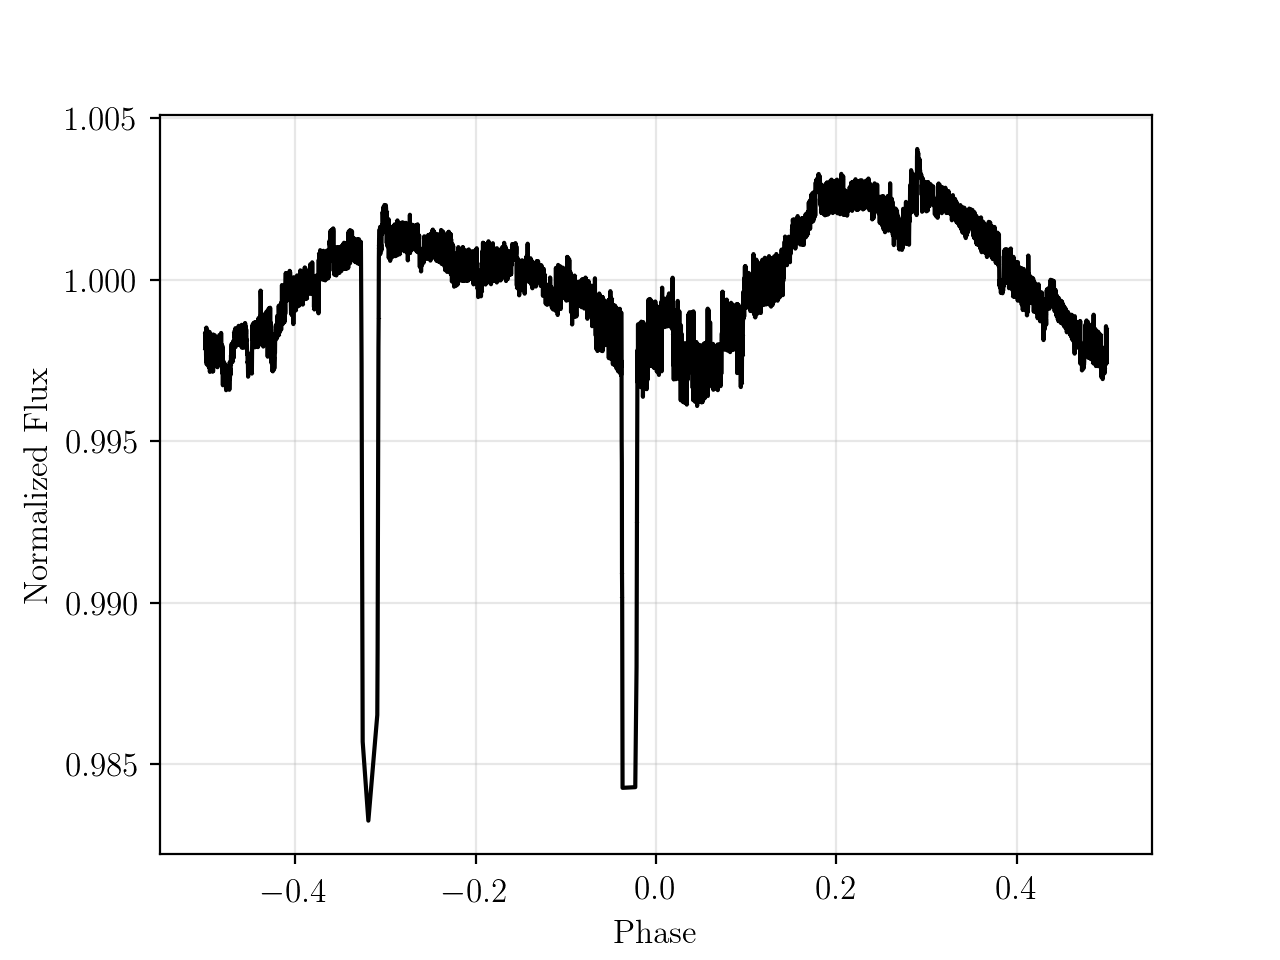

In [9]:
lc_outliers = lc.remove_outliers()
lc_outliers.fold(171.2776968).bin().plot()

### Looks like removing outliers is a bit overzealous for an eclipsing binary, ha!

In [10]:
lc.properties()

   Attribute              Description           
--------------- --------------------------------
        channel                               83
       keplerid                          9246715
        quarter                                0
        mission                           Kepler
quality_bitmask                          default
    time_format                             bkjd
     time_scale                              tdb
      cadenceno                   array (64026,)
   centroid_col                   array (64026,)
   centroid_row                   array (64026,)
           flux                   array (64026,)
       flux_err                   array (64026,)
        quality                   array (64026,)
           time                   array (64026,)
   astropy_time <class 'astropy.time.core.Time'>
       campaign               <class 'NoneType'>
            dec                  <class 'float'>
           meta                   <class 'dict'>
             ra     

<IPython.core.display.Javascript object>


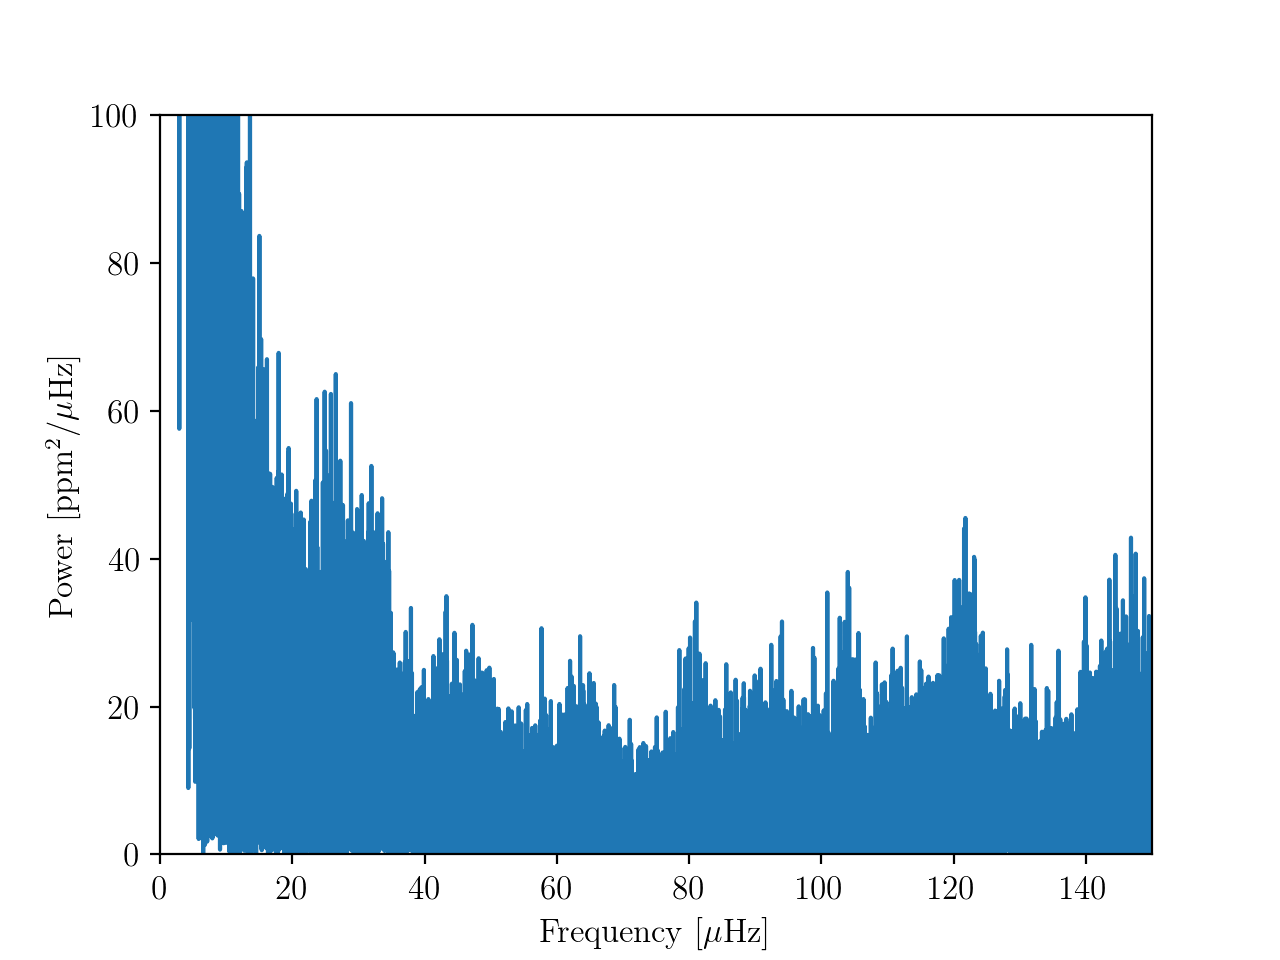

(0, 100)

In [28]:
p = lc.periodogram()
ax = p.plot()
ax.set_xlim(0, 150)
ax.set_ylim(0, 100)

### Not bad for working for about an hour! The real oscillation signal should be around 100 microHz, though, so there's still some issues... eclipses still need to be handled. And this is the regular old Lomb-Scargle periodogram.